# Visualizing inference in multivariate von mises distributions

In [1]:
%matplotlib inline
%config InlineBackend.figure_format ='retina'
from VonMisesFunctions import *

In [2]:
"""
Parameters
"""
# 1. BP parameters
K = 30 # no. of discrete bins
MaxIters, lam, eps = 500, 0.25, 1e-12

# 2. Gibbs sampling parameters
N_samples, T_burnin, T_skip = 4000, 2000, 50 # No. of samples to ignore for burn-in and, samples to skip

bin_edges, bin_centers = pi*np.arange(0,K+1)/K - pi/2, pi*(np.arange(0,K)/K + 0.5/K - 1/2)

In [3]:
"""
I) Bivariate distributions
"""
Ns = 2# No. of variables

KVec, MuVec = np.array([1,1]), np.array([0,pi/3])
jcc, jcs, jsc, jss = 0.5,1,1,-3 
J = np.zeros([2,2,4]); J[0,1] = np.array([jcc, jcs, jsc, jss]); J[1,0] = np.array([jcc, jsc, jcs, jss])

Phi, Psi, messages_t, beliefs_t, err_t = BPWrapper(Ns, KVec, MuVec, J, K, MaxIters, lam, eps)
Joint = np.expand_dims(Phi[0],axis=0)*Psi[0,1]*np.expand_dims(Phi[1],axis=1)

G_samples, G_marginals = GibbsSamplingWrapper(KVec, MuVec, J, K, N_samples, T_burnin, T_skip)

Converged in 50 iterations
Time taken for BP = 0.02 s
Time taken for Gibbs sampling = 11.39 s


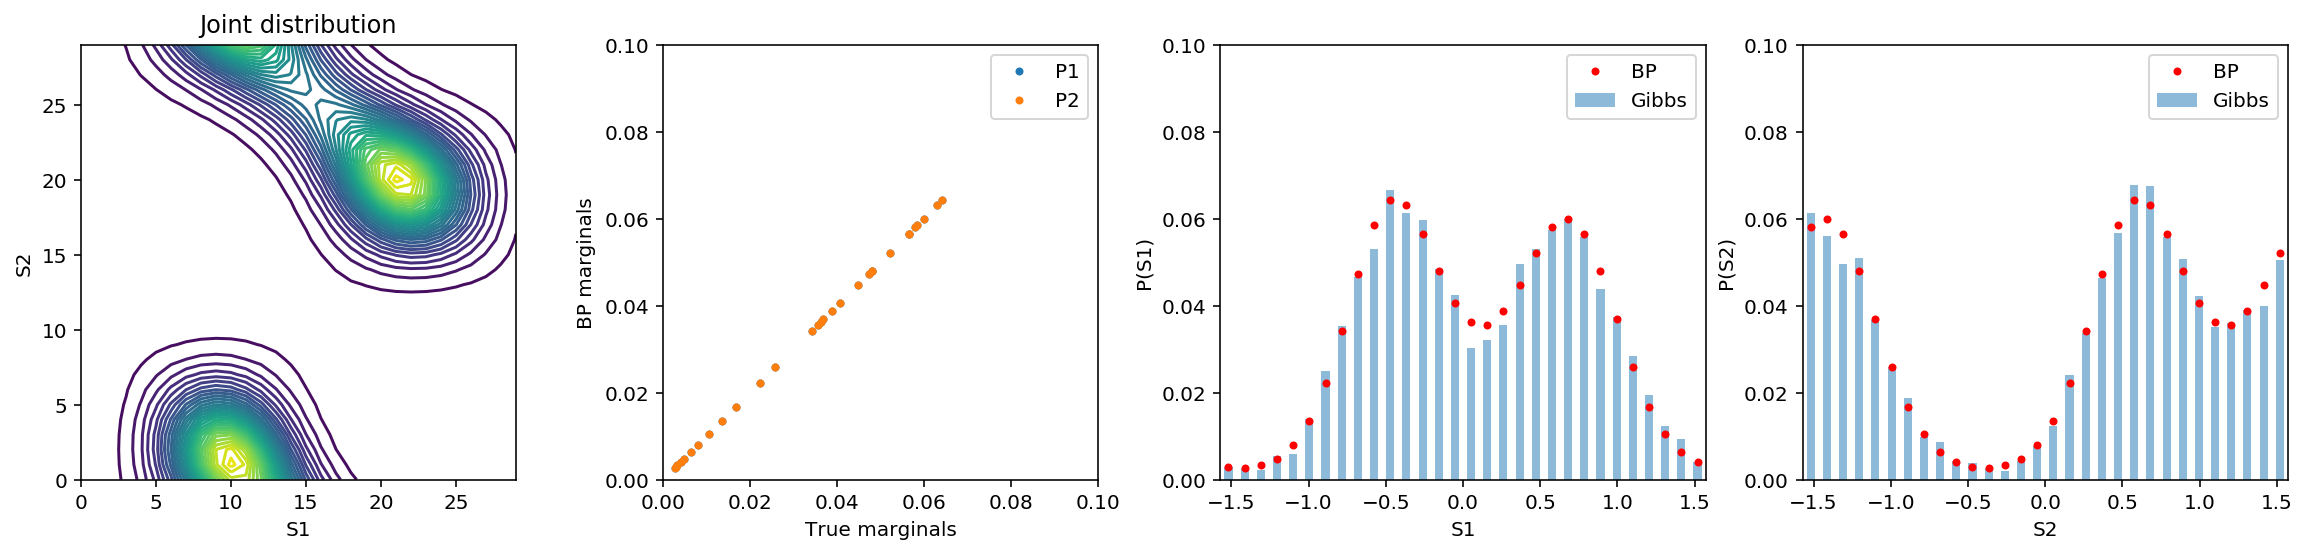

In [4]:
# Make plots
marg0 = np.sum(Joint,axis=0)
marg0 = marg0/sum(marg0)

marg1 = np.sum(Joint,axis=1)
marg1 = marg1/sum(marg1)

pmax = max(np.ceil(np.max(beliefs_t)*10)/10, np.ceil(np.max(G_marginals)*10)/10)

fig, ax = plt.subplots(1,4,figsize=(5*4, 4))

ax[0].contour(Joint,30)
ax[0].axis('square')
ax[0].set_xlabel('S1'); ax[0].set_ylabel('S2'); ax[0].set_title('Joint distribution')


ax[1].plot(marg0,beliefs_t[0,:,-1],'.'); ax[1].plot(marg1,beliefs_t[1,:,-1],'.')
ax[1].axis('square'); ax[1].axis([0,pmax,0,pmax])
ax[1].set_xlabel('True marginals'); ax[1].set_ylabel('BP marginals'); ax[1].legend(['P1','P2'])



ax[2].plot(bin_centers,beliefs_t[0,:,-1],'r.')
ax[2].bar(bin_centers,G_marginals[0],width=pi/2/K,alpha=0.5)
ax[2].axis([-pi/2,pi/2,0,pmax])
ax[2].set_xlabel('S1'); ax[2].set_ylabel('P(S1)'); ax[2].legend(['BP','Gibbs'])

ax[3].plot(bin_centers,beliefs_t[1,:,-1],'r.')
ax[3].bar(bin_centers,G_marginals[1],width=pi/2/K,alpha=0.5)
ax[3].axis([-pi/2,pi/2,0,pmax])
ax[3].set_xlabel('S2'); ax[3].set_ylabel('P(S2)'); ax[3].legend(['BP','Gibbs'])

# plt.savefig('PlotData/Bivariate.pdf')
plt.show()

In [5]:
"""
II) Tree vs. loopy graphs
"""

# 1. Tree graph

Ns = 4 # No. of variables

# Tree graph
s_strength, c_sparsity, c_strength = 1.5, 0, 2.5 # Singleton potential strength, pairwise coupling sparsity and strengths
KVec, MuVec = s_strength*np.random.rand(Ns), np.random.rand(Ns)*pi - pi/2
J = generateCouplings(Ns, c_sparsity, c_strength)                  

# make chain
J[0,2] = J[0,2]*0; J[2,0] = J[2,0]*0
J[0,3] = J[0,3]*0; J[3,0] = J[3,0]*0
J[1,3] = J[1,3]*0; J[3,1] = J[3,1]*0

AMat = (np.sum(np.abs(J),axis=2) != 0)*1

Phi, Psi, messages_t, beliefs_t, err_t = BPWrapper(Ns, KVec, MuVec, J, K, MaxIters, lam, eps)

G_samples, G_marginals = GibbsSamplingWrapper(KVec, MuVec, J, K, N_samples, T_burnin, T_skip)


Converged in 61 iterations
Time taken for BP = 0.03 s
Time taken for Gibbs sampling = 19.80 s


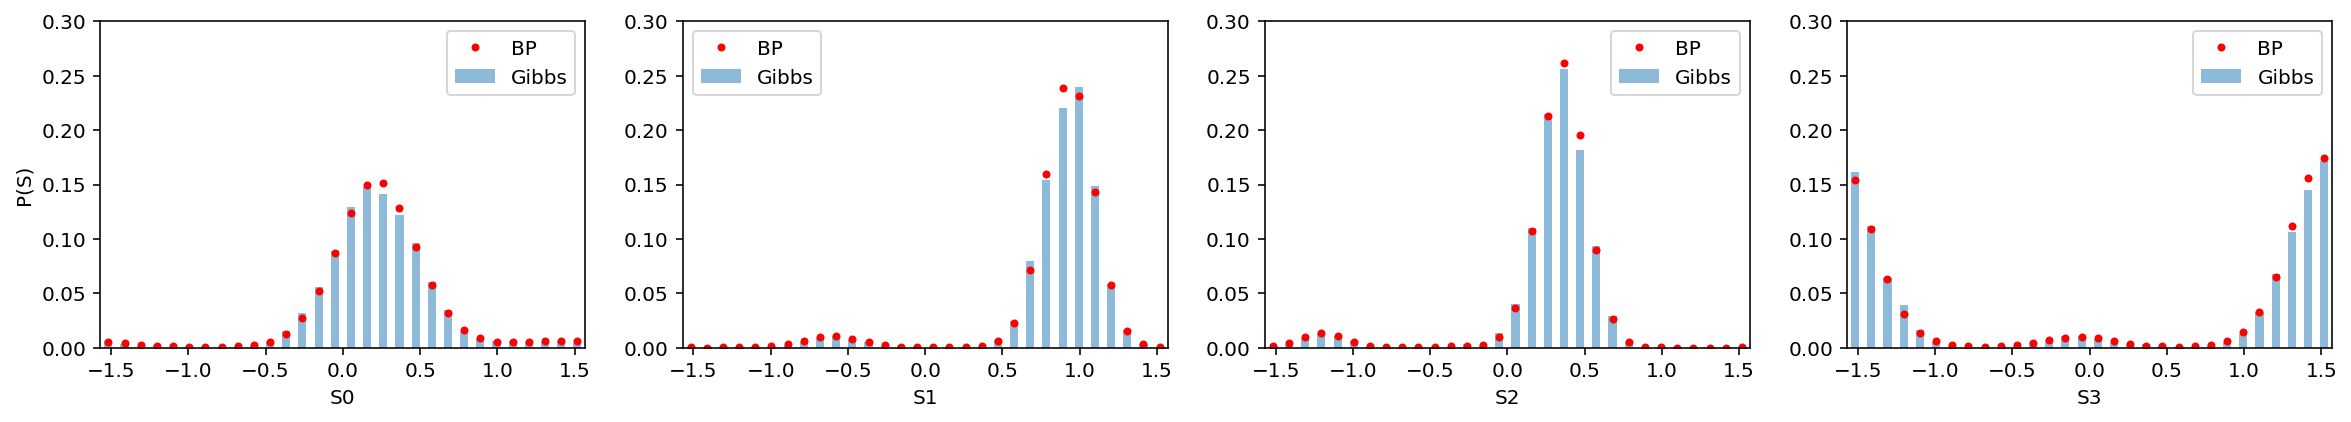

In [6]:
pmax = max(np.ceil(np.max(beliefs_t)*10)/10, np.ceil(np.max(G_marginals)*10)/10)
    
fig, ax = plt.subplots(1,Ns,figsize=(5*Ns, 3))
ax = ax.ravel()
for i in range(Ns): 
    ax[i].plot(bin_centers,beliefs_t[i,:,-1],'r.')
    ax[i].bar(bin_centers,G_marginals[i],width=pi/2/K,alpha=0.5)
    ax[i].axis([-pi/2,pi/2,0,pmax])
    ax[i].set_xlabel('S' + str(i))
    ax[i].legend(['BP','Gibbs'])
ax[0].set_ylabel('P(S)')

# plt.savefig('PlotData/Tree4.pdf')
plt.show()

In [7]:
# 2. Loopy graph, fully connected 4x4 graph

Ns = 4 # No. of variables

# Tree graph
s_strength, c_sparsity, c_strength = 2, 0, 2 # Singleton potential strength, pairwise coupling sparsity and strengths
KVec, MuVec = s_strength*np.random.rand(Ns), np.random.rand(Ns)*pi - pi/2
J = generateCouplings(Ns, c_sparsity, c_strength)                  

AMat = (np.sum(np.abs(J),axis=2) != 0)*1

Phi, Psi, messages_t, beliefs_t, err_t = BPWrapper(Ns, KVec, MuVec, J, K, MaxIters, lam, eps)

G_samples, G_marginals = GibbsSamplingWrapper(KVec, MuVec, J, K, N_samples, T_burnin, T_skip)

Converged in 304 iterations
Time taken for BP = 0.17 s
Time taken for Gibbs sampling = 19.94 s


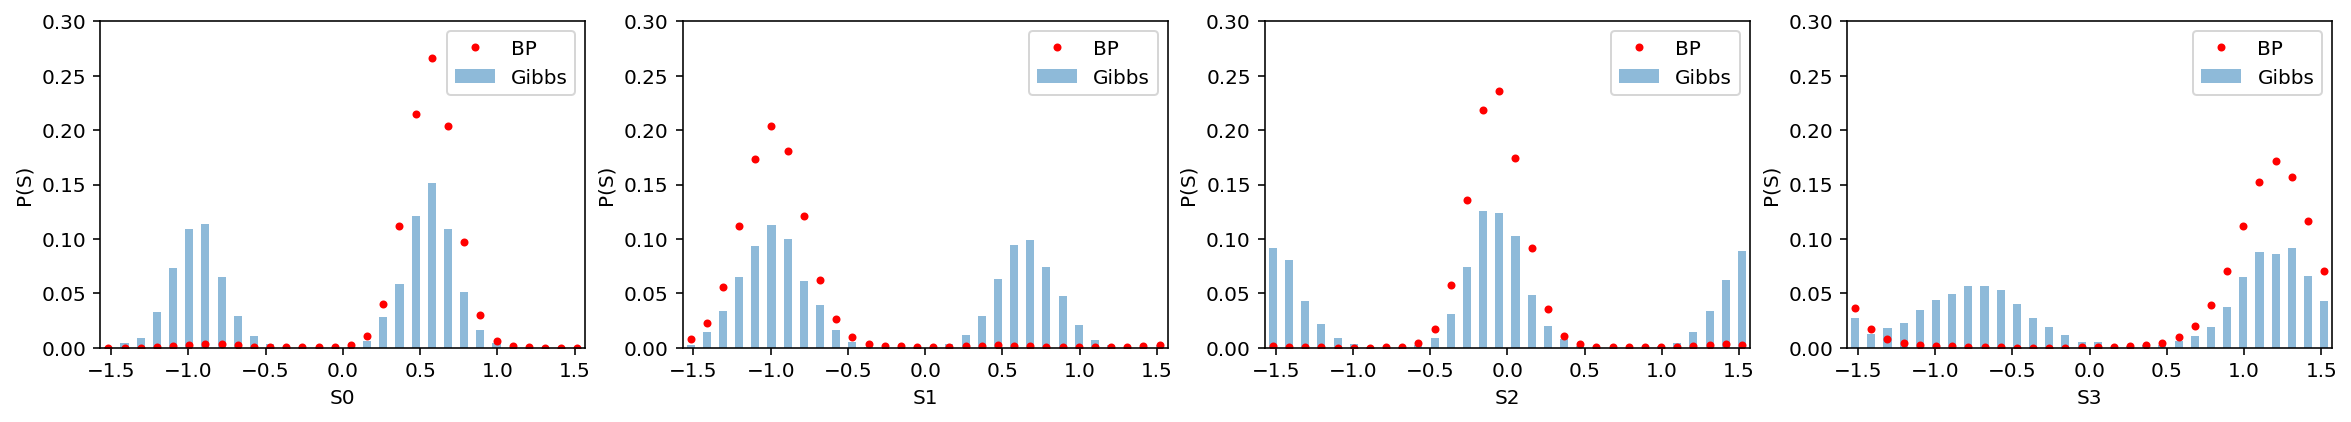

In [8]:
pmax = max(np.ceil(np.max(beliefs_t)*10)/10, np.ceil(np.max(G_marginals)*10)/10)
    
fig, ax = plt.subplots(1,Ns,figsize=(5*Ns, 3))
ax = ax.ravel()
for i in range(Ns): 
    ax[i].plot(bin_centers,beliefs_t[i,:,-1],'r.')
    ax[i].bar(bin_centers,G_marginals[i],width=pi/2/K,alpha=0.5)
    ax[i].axis([-pi/2,pi/2,0,pmax])
    ax[i].set_xlabel('S' + str(i)); ax[i].set_ylabel('P(S)'); ax[i].legend(['BP','Gibbs'])

#plt.savefig('PlotData/Loopy4.pdf')
plt.show()

In [20]:
"""
III) Interesting BP dynamics
"""

Ns = 25 # No. of variables

s_strength, c_sparsity, c_strength = 2, 0.75, 1.5 # Singleton potential strength, pairwise coupling sparsity and strengths
KVec, MuVec = s_strength*np.random.rand(Ns), np.random.rand(Ns)*pi - pi/2
J = generateCouplings(Ns, c_sparsity, c_strength) 
AMat = (np.sum(np.abs(J),axis=2) != 0)*1

MaxIters = 500

Phi, Psi, messages_t, beliefs_t, err_t = BPWrapper(Ns, KVec, MuVec, J, K, MaxIters, lam, eps)


Did not converge in 500 iterations.
Time taken for BP = 3.80 s


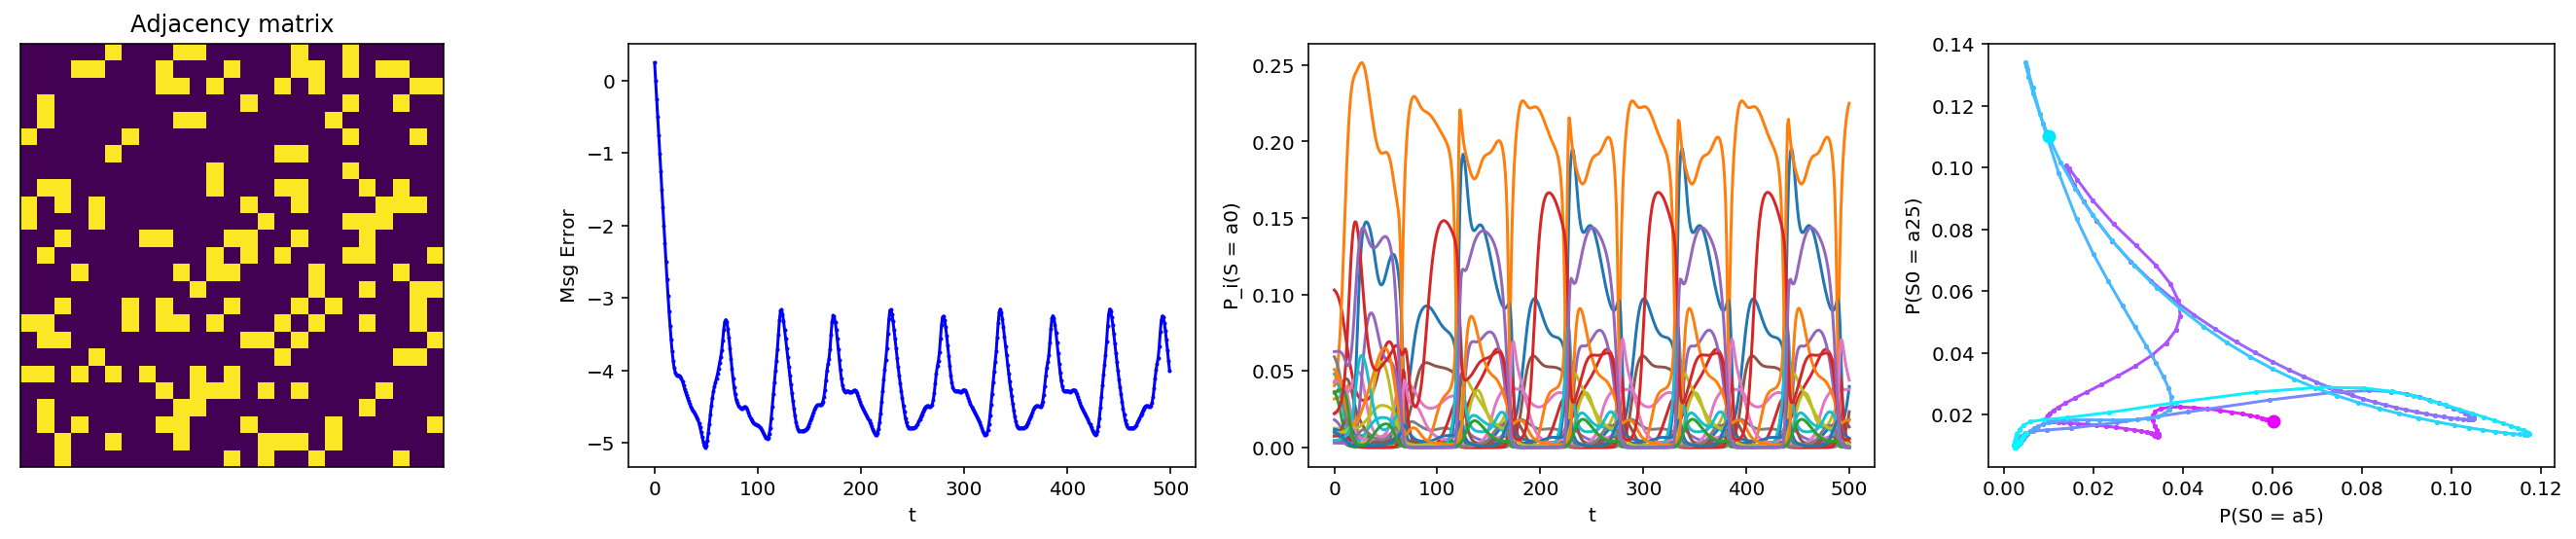

In [21]:
fig, ax = plt.subplots(1,4,figsize=(6*4, 4))
T = beliefs_t.shape[2]

ax[0].imshow(AMat)
ax[0].set_xticks([]); ax[0].set_yticks([])
ax[0].set_title('Adjacency matrix')


ax[1].plot(np.log10(err_t),'b.-',markersize=2)
ax[1].set_xlabel('t'); ax[1].set_ylabel('Msg Error')


ax[2].plot(beliefs_t[:,1,:].T)
ax[2].set_xlabel('t'); ax[2].set_ylabel('P_i(S = a0)')


i = 0

colors = np.linspace(0.9,0,T//2)
for t in range(1,T//2):
    ax[3].plot([beliefs_t[i,5,t-1], beliefs_t[i,5,t]],[beliefs_t[i,25,t-1], beliefs_t[i,25,t]],'.-',markersize=3,color=(colors[t],1-colors[t],1))
ax[3].plot(beliefs_t[i,5,0],beliefs_t[i,25,0],'o',color=(0.9,0,1))
ax[3].plot(beliefs_t[i,5,-1],beliefs_t[i,25,-1],'o',color=(0,0.9,1))
ax[3].set_xlabel('P(S0 = a5)'); ax[3].set_ylabel('P(S0 = a25)')


plt.show()

In [ ]:
# Ns = 20
# Simple - 2, 0.8, 1
# Damped - 2, 0.7, 1
# Damped2 - 2, 0.85, 1.5
# Oscillation - 2, 0.7, 1.5
# rich dynamics - 2, 0.75, 2

# Ns = 100
# Converged in 167 iterations
# Time taken for BP =  7.6 s

# Ns = 250
# Converged in 186 iterations
# Time taken for BP =  1862.436 s
# average degree = 12.24